In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plotting defaults
import matplotlib as mpl

# Update matplotlib parameters in a single dictionary
mpl.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": False,
        "pgf.rcfonts": False,
        "pgf.preamble": r"\usepackage{amsfonts}\usepackage{amssymb}\usepackage{amsmath}",
        "lines.linewidth": 1,  # Set line width to 1
    }
)

In [46]:
# Define experiments to plot from directory structure and filenames

list_of_experiments = ["train100"]
embedding_sizes = [1, 2, 5, 10, 25]
list_of_seeds = [1996]
init_types = ["normal", "uniform", "pca_inspired", "look-normal"]

summary_list = []

for initializer in init_types:
    for embedding_size in embedding_sizes:
        for seed in list_of_seeds:
            for exp in list_of_experiments:
                exp_name = (
                    f"seed{seed}/{exp}/experiment01_global-{initializer}_B={embedding_size}"
                )
                print(f"Plotting results for experiment: {exp_name}")

                # Load results
                results_df = pd.read_csv(f"/home/dw/cuTAGI_DW/out/{exp_name}/evaluation_metrics.txt")

                # take last row only
                last_row = results_df.iloc[-1]

                # remove first column
                last_row = last_row[1:].values

                # append to a summary list
                summary = {
                    "experiment": exp,
                    "initializer": initializer,
                    "embedding_size": embedding_size,
                    "seed": seed,
                    "rmse": last_row[0],
                    "log_lik": last_row[1],
                    "mae": last_row[2],
                    "p50": last_row[3],
                    "p90": last_row[4],
                }

                summary_list.append(summary)

Plotting results for experiment: seed1996/train100/experiment01_global-normal_B=1
Plotting results for experiment: seed1996/train100/experiment01_global-normal_B=2
Plotting results for experiment: seed1996/train100/experiment01_global-normal_B=5
Plotting results for experiment: seed1996/train100/experiment01_global-normal_B=10
Plotting results for experiment: seed1996/train100/experiment01_global-normal_B=25
Plotting results for experiment: seed1996/train100/experiment01_global-uniform_B=1
Plotting results for experiment: seed1996/train100/experiment01_global-uniform_B=2
Plotting results for experiment: seed1996/train100/experiment01_global-uniform_B=5
Plotting results for experiment: seed1996/train100/experiment01_global-uniform_B=10
Plotting results for experiment: seed1996/train100/experiment01_global-uniform_B=25
Plotting results for experiment: seed1996/train100/experiment01_global-pca_inspired_B=1
Plotting results for experiment: seed1996/train100/experiment01_global-pca_inspired

In [47]:
rmse_global = 0.6063
loglik_global = -1.0140
mae_global = 0.5033
p50_global = 0.5739
p90_global = 0.2982

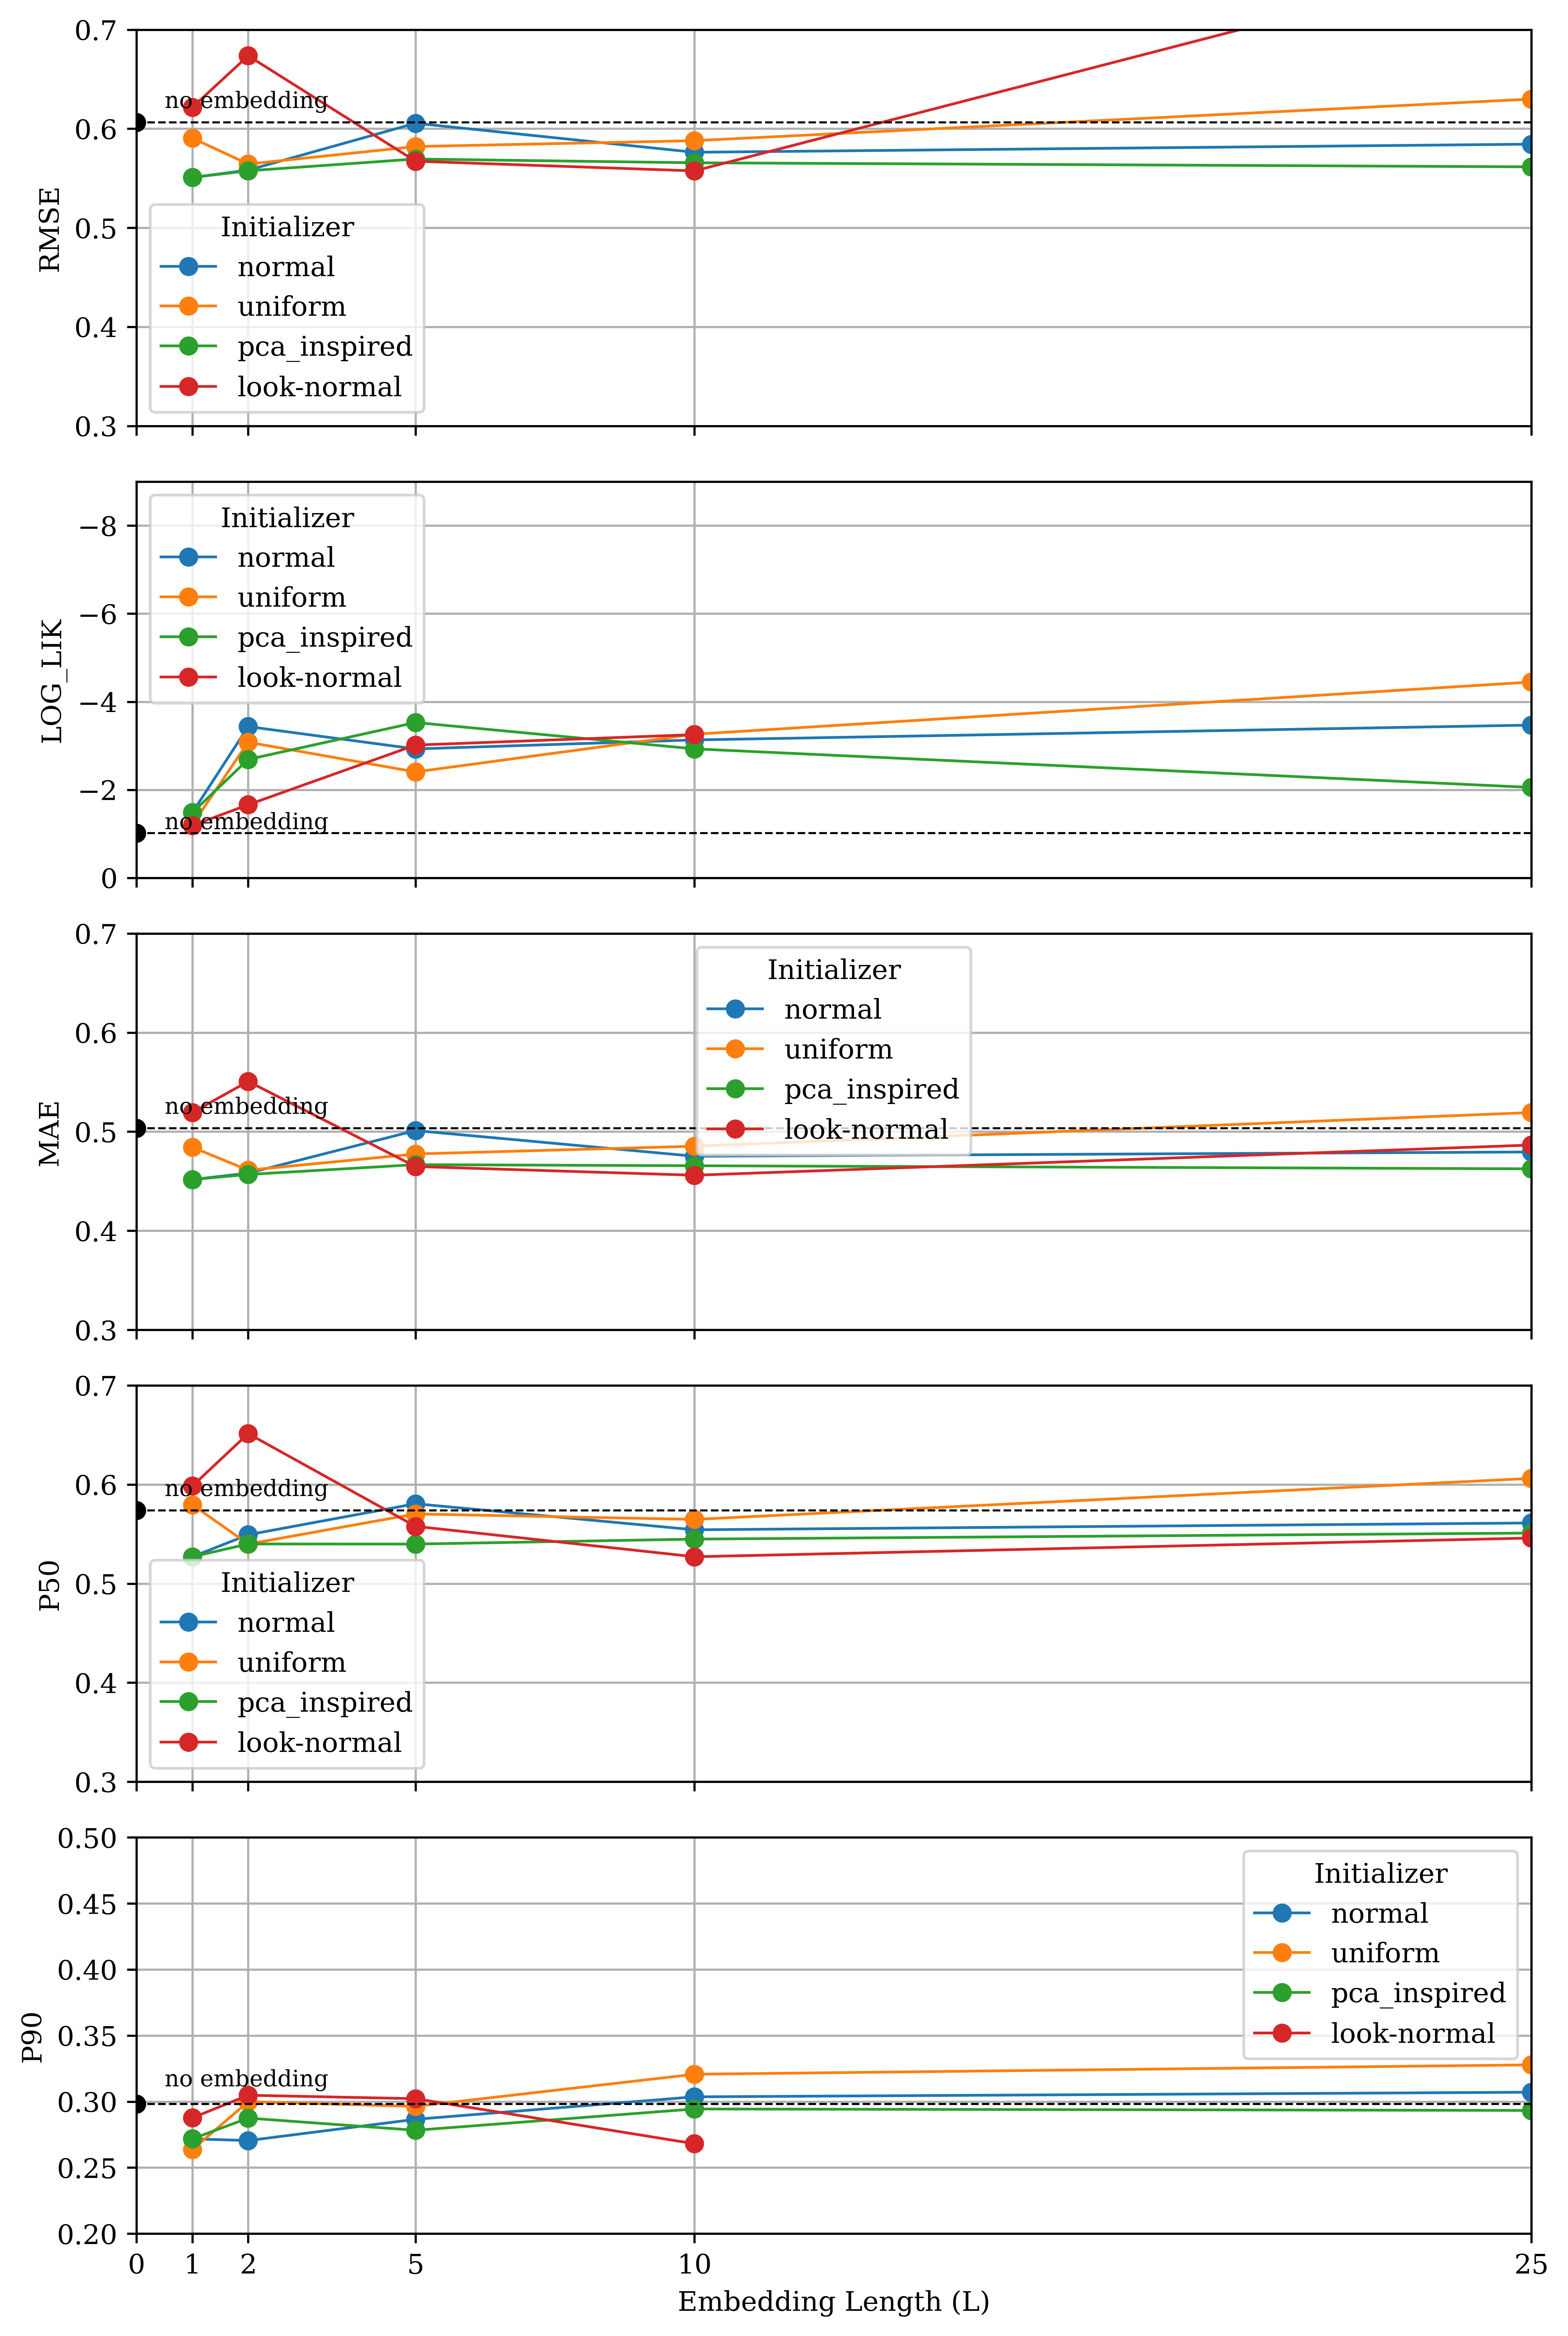

In [48]:
# Plot summary where B is on x-axis and y-axis is rmse, log_lik, mae, p50, p90
summary_df = pd.DataFrame(summary_list)
fig, axs = plt.subplots(5, 1, figsize=(8, 12), sharex=True, dpi=600)

metrics = ["rmse", "log_lik", "mae", "p50", "p90"]
global_map = {
    "rmse": rmse_global,
    "log_lik": loglik_global,
    "mae": mae_global,
    "p50": p50_global,
    "p90": p90_global,
}

for metric, ax in zip(metrics, axs):
    plotted_inits = set()
    for initializer in init_types:
        for seed in list_of_seeds:
            seed_df = summary_df[(summary_df["initializer"] == initializer) & (summary_df["seed"] == seed)]
            if seed_df.empty:
                continue
            seed_df = seed_df.sort_values("embedding_size")
            label = initializer if initializer not in plotted_inits else None
            ax.plot(
                seed_df["embedding_size"],
                seed_df[metric],
                marker="o",
                label=label,
            )
        plotted_inits.add(initializer)

    # add global "no embedding" marker at x=0
    global_val = global_map[metric]
    ax.axhline(global_val, color="k", linestyle="--", linewidth=0.75)
    ax.scatter(0, global_val, color="k", marker="o", zorder=5)
    ax.text(
        0.5,
        global_val + 0.01,
        "no embedding",
        color="k",
        fontsize="small",
        va="bottom",
    )

    if ax is axs[-1]:
        ax.set_xlabel("Embedding Length (L)")
        ax.set_xticks([0] + embedding_sizes)
    ax.set_ylabel(metric.upper())
    ax.grid()

    if metric == "log_lik":
        ax.set_ylim(-9, 0)
        ax.invert_yaxis()
    elif metric in ["rmse", "mae", "p50"]:
        ax.set_ylim(0.3, 0.7)
    else:
        ax.set_ylim(0.2, 0.5)

    ax.set_xlim(0, embedding_sizes[-1])
    ax.legend(title="Initializer")

plt.tight_layout()
plt.show()